In [119]:
#Importer les dependances 
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np

In [121]:
#Chargement des données
iris = pd.read_csv('iris.csv')

In [123]:
#Taille du DataFrame
iris.shape

(150, 6)

In [125]:
#Infos sur la structure
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [127]:
#Profilage
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [129]:
#Vérifier s'il y'a des valeurs nulles
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [131]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
iris = iris.drop(columns = "Id")

In [135]:
iris= iris.replace({'Species': {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}})

C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_8636\3246724166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris= iris.replace({'Species': {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}})


In [137]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [139]:
X = iris.drop('Species', axis = 1)

In [141]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
Y = iris['Species']

In [145]:
X.shape, Y.shape

((150, 4), (150,))

In [147]:
scaler = StandardScaler()

In [149]:
scaler.fit(X)

StandardScaler()

In [151]:
transformed_data = scaler.transform(X)

In [153]:
X = transformed_data

In [155]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=2)

In [157]:
X.shape, X_Train.shape, X_Test.shape 

((150, 4), (120, 4), (30, 4))

In [159]:

classifier = svm.SVC(kernel = 'linear')

In [161]:
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [163]:
#Précision du modéle sur les modéles d'entrainement
X_Train_prediction = classifier.predict(X_Train)
X_Train_Accuracy = accuracy_score(Y_Train,X_Train_prediction)
print(X_Train_Accuracy)

0.9833333333333333


In [165]:
#Précision du modéle sur les données de test
X_Test_prediction = classifier.predict(X_Test)
X_Test_Accuracy = accuracy_score(Y_Test,X_Test_prediction)
print(X_Test_Accuracy )

0.9666666666666667


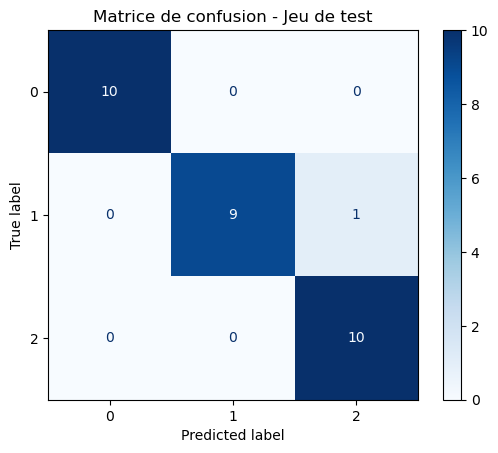

In [113]:
# Matrice de confusion
cm = confusion_matrix(Y_Test, X_Test_prediction)
# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Jeu de test")
plt.show()

In [116]:
#Demander à l'utilisateur de saisir les caractéristiques d'une fleur Iris
length_sepal = float(input("Entrer la longueur du sepal en cm : "))
width_sepal = float(input("Entrer la largeur du sepal en cm : "))
length_petal = float(input("Entrer la longueur du pétale en cm : "))
width_petal = float(input("Entrer la largeur du pétale en cm : "))
#Créer un tuple avec les valeurs saisies par l'utilisateur
input_data = (length_petal,width_petal,length_petal,width_petal)
# Convertir les données d'entrée en tableau NumPy
input_data_as_numpy_array = np.asarray(input_data)
#Redimensionner le tableau pour qu'il corresponde au format attendu par le modèle 
input_reshaped = input_data_as_numpy_array.reshape(1,-1)
#Standardiser les données d'entrée avec le même scaler que celui utilisé pendant l'entraînement
std_data = scaler.transform(input_reshaped)
#Utiliser le modèle entraîné pour prédire la classe de la fleur
prediction = classifier.predict(std_data)
#Afficher le nom de la classe prédite
if prediction[0] == 0 :
    print("Iris Setosa")
elif prediction[0] == 1 :
    print("Iris-versicolor")
else :
    print("Iris-virginica")

Entrer la longueur du sepal en cm :  1
Entrer la largeur du sepal en cm :  1
Entrer la longueur du pétale en cm :  1
Entrer la largeur du pétale en cm :  1


Iris Setosa


C:\Users\X1 Carbon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
